In [1]:
from __future__ import print_function, division
import os
import json
import glob
import seaborn
import scipy.stats
import numpy as np
import pandas as pd
import urllib as ulr
import geopandas as gp
import matplotlib.pylab as pl
import statsmodels.formula.api as smf

%matplotlib inline
%pylab inline

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
#CURL DATAFILES FROM URL TO LOCAL DIRECTORY
#os.system("curl -O https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD/rows.csv")
os.system("curl -O https://data.cityofnewyork.us/resource/m46j-75iy.json")
os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")

0

In [3]:
#MOVE CURLED DATA FILES TO PUIDATA DIRECTORY
os.system("mv " + "m46j-75iy.json " + os.getenv("PUIDATA"))
os.system("mv " + "mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))

0

In [4]:
#Please copy and paste the following into the box below, minus quotes: 'mn_mappluto_16v1.zip'
infile = raw_input("Enter Input File Name for unzipping: ")
#Please copy and paste the following into the box below, minus quotes: 'MNPlutoOutput'
outfolder = raw_input("Enter Output Folder Name for unzipping: ")

def unzipPUIDATA(infile, outfolder):
    infile = os.getenv('PUIDATA') + '/' + infile
    outfolder = os.getenv('PUIDATA') + '/' + outfolder + '/'
    os.system('unzip ' + infile + ' -d ' +  outfolder)
    return outfolder
unzipPUIDATA(infile, outfolder)

Enter Input File Name for unzipping: mn_mappluto_16v1.zip
Enter Output Folder Name for unzipping: MNPlutoOutput


'/home/cusp/fk759/PUIdata/MNPlutoOutput/'

In [5]:
nrg_url = 'https://data.cityofnewyork.us/resource/m46j-75iy.json'
nrg_data = ulr.urlopen(nrg_url).read()

In [6]:
nrg = pd.read_json(nrg_data)
nrg_drop_col = [u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', 
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins', u'reported_water_method',
       u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',  u'reported_property_floor_area_building_s_ft',
       u'weather_normalized_source_eui_kbtu_ft2']
nrg.drop(nrg_drop_col, axis = 1, inplace = True)
col = ['NumberofBuildings', 'FloorArea', 'BBL', 'SiteEUI(Kbty/ft2)', 'ZipCode']
nrg.columns = col
nrg.dropna(axis = 0, how = 'any', subset = col, inplace = True)
nrg.head()

,NumberofBuildings,FloorArea,BBL,SiteEUI(Kbty/ft2),ZipCode
16,1.0,313200.0,1.013110e+09,125.4,10022.0
45,1.0,184400.0,4.002520e+09,46,11101.0
64,1.0,53168.0,1.007660e+09,122.3,10011.0
65,1.0,364000.0,1.008150e+09,117,10018.0
77,1.0,214110.0,1.005050e+09,82.1,10013.0


In [12]:
ShapeData = os.getenv('PUIDATA') + '/' + outfolder + '/' + 'MNMapPLUTO.shp'
ShapeData = gp.read_file(ShapeData)
ShapeData_drop = [    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
        u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry']

In [14]:
ShapeData.drop(ShapeData_drop, axis = 1, inplace = True)
ShapeData.head()

,BBL,BldgArea,NumBldgs,UnitsRes,UnitsTotal
0,1.015450e+09,10885,1,16,18
1,1.007238e+09,89203,1,50,50
2,1.016800e+09,12000,1,10,10
3,1.013850e+09,203490,1,29,32
4,1.011970e+09,13839,1,26,26


In [15]:
col_s = ShapeData.columns
ShapeData.dropna(axis = 0, how = 'any', subset = col_s, inplace = True)

In [17]:
comb = ShapeData.merge(nrg, on = 'BBL')
comb.head()

,BBL,BldgArea,NumBldgs,UnitsRes,UnitsTotal,NumberofBuildings,FloorArea,SiteEUI(Kbty/ft2),ZipCode
0,1.007238e+09,89203,1,50,50,1.0,97563.0,68.7,10001.0
1,1.013850e+09,203490,1,29,32,1.0,203490.0,87.4,10021.0
2,1.021740e+09,52920,1,72,72,1.0,52920.0,140.4,10040.0
3,1.008830e+09,98359,1,107,108,1.0,98359.0,96.5,10016.0
4,1.008570e+09,140000,1,134,138,1.0,140000.0,36.4,10016.0


In [23]:
comb['SiteEUI(Kbty/ft2)'] = pd.to_numeric(comb['SiteEUI(Kbty/ft2)'], errors='coerce')
comb['SiteEUITotal'] = comb['SiteEUI(Kbty/ft2)'] * comb['FloorArea']
comb.dtypes

BBL                  float64
BldgArea               int64
NumBldgs               int64
UnitsRes               int64
UnitsTotal             int64
NumberofBuildings    float64
FloorArea            float64
SiteEUI(Kbty/ft2)    float64
ZipCode              float64
SiteEUITotal         float64
dtype: object

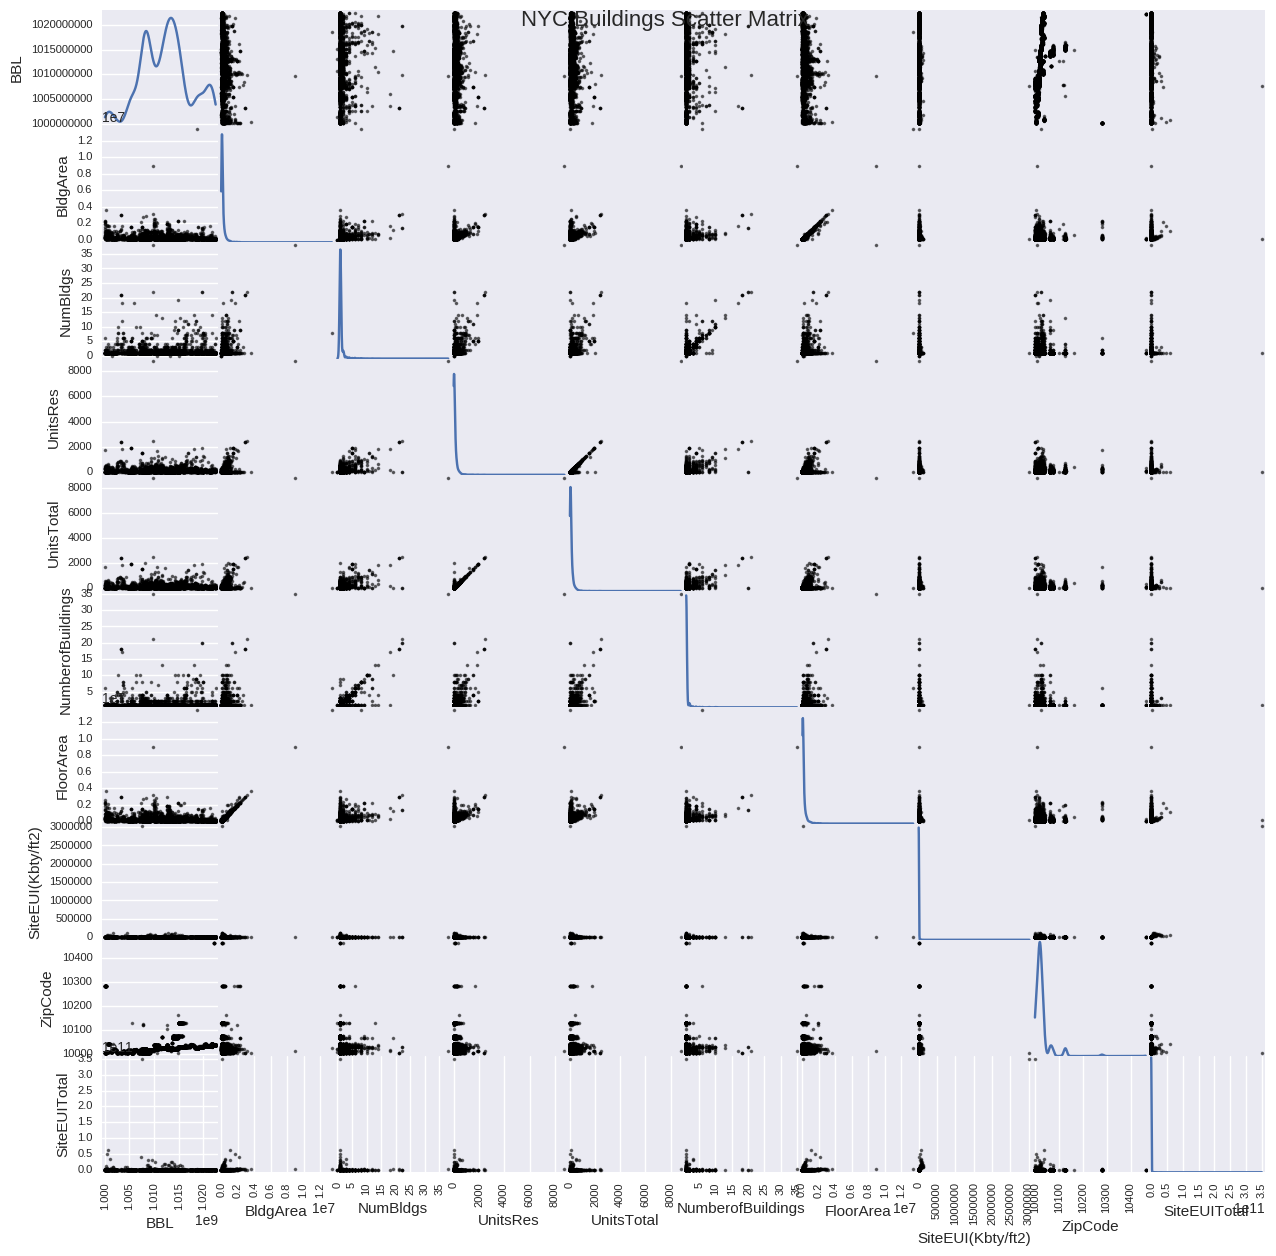

In [30]:
comb_fig = pd.scatter_matrix(comb, linewidth= 1, 
                              s=10, alpha = 0.5, c = 'k', 
                              figsize=(15, 15), diagonal='kde')
pl.suptitle('NYC Buildings Scatter Matrix', y=0.9, fontsize = 16)
pl.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1c2916350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa1c0861d50>]], dtype=object)

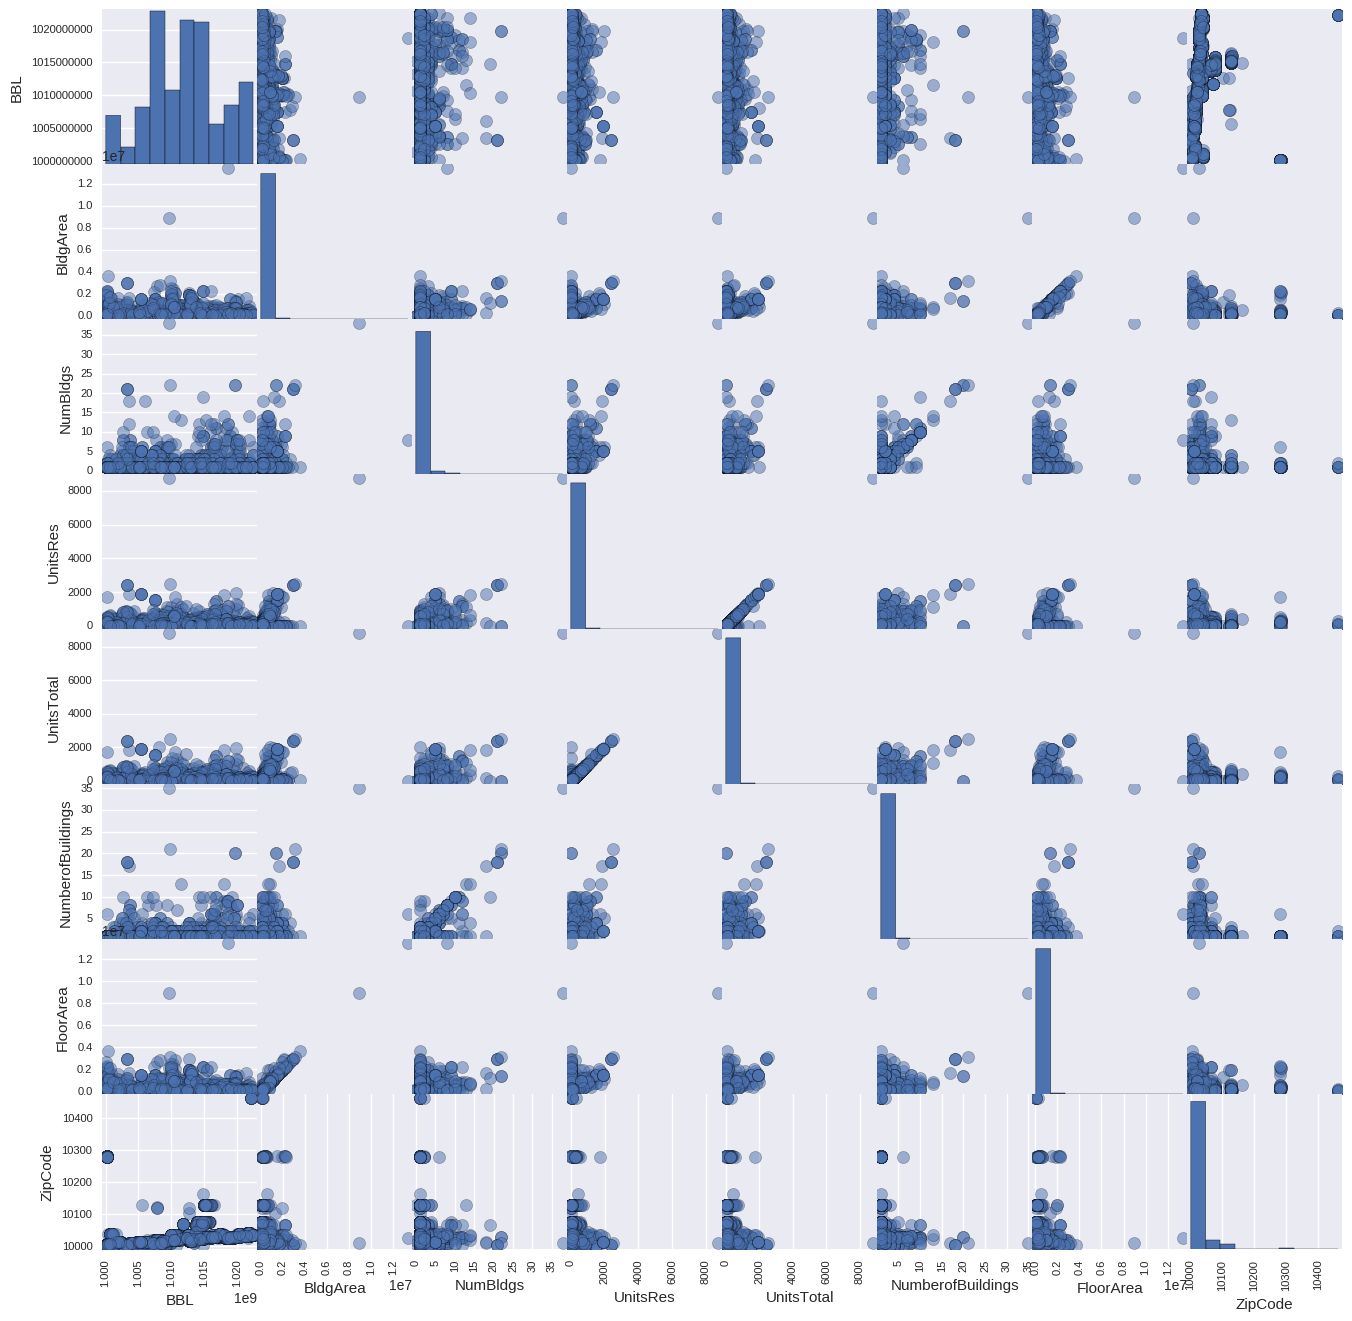

In [21]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(comb, s=300, figsize=(16,16))

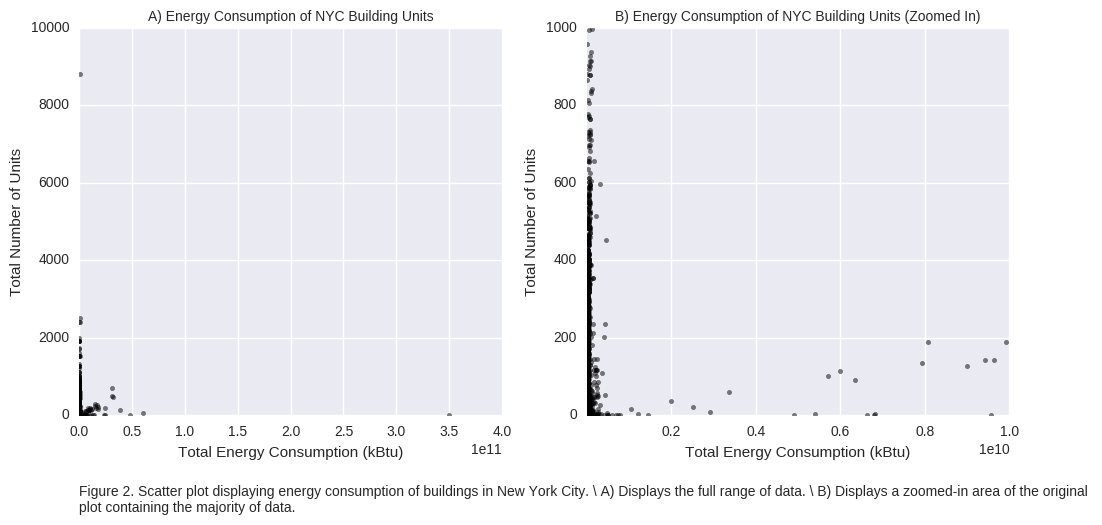

In [35]:
fig, (ax_1, ax_2) = pl.subplots(nrows = 1, ncols=2, figsize = (12, 5))
ax_1.scatter(comb['SiteEUITotal'], comb['UnitsTotal'], alpha=0.5, s = 10, c = 'k')
ax_1.axis([0, 400000000000, 0, 10000])
ax_1.set_ylabel('Total Number of Units')
ax_1.set_xlabel('Total Energy Consumption (kBtu)')
ax_1.set_title('A) Energy Consumption of NYC Building Units', fontsize = 10)
ax_2.scatter(comb['SiteEUITotal'], comb['UnitsTotal'],
           alpha=0.5, s = 10, c = 'k')
ax_2.axis([1000, 10000000000, 0, 1000])
ax_2.set_ylabel('Total Number of Units')
ax_2.set_xlabel('Total Energy Consumption (kBtu)')
ax_2.set_title('B) Energy Consumption of NYC Building Units (Zoomed In)', fontsize = 10)

ax_1.text(0, -2500, 'Figure 2. Scatter plot displaying energy consumption \
of buildings in New York City. \ A) Displays the full range of data. \ B) Displays a zoomed-in \
area of the original \nplot containing the majority of data.')
            

In [36]:
comb.drop(comb[comb['UnitsTotal'] < 1].index, axis = 0, inplace = True)
comb.drop(comb[comb['SiteEUITotal'] < 1].index, axis = 0, inplace = True)
comb['LogUnitsTotal'] = np.log10(comb['UnitsTotal'])
comb['LogSiteEUITotal'] = np.log10(comb['SiteEUITotal'])
comb.drop(comb[comb['LogUnitsTotal'] < 1].index, axis = 0, inplace = True)
comb.dropna(axis = 0, how = 'any', subset = ['LogSiteEUITotal'], inplace = True)

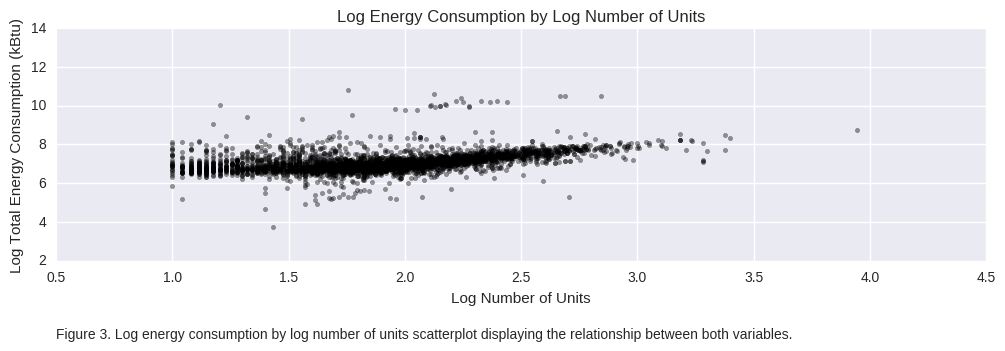

In [39]:
fig, (ax_1) = pl.subplots(nrows = 1, ncols = 1, figsize = (12, 3))
ax_1.scatter(comb['LogUnitsTotal'], comb['LogSiteEUITotal'],
           alpha=0.4, s = 10, c = 'k')
ax_1.axis([0.5, 4.5, 2, 14])
ax_1.set_ylabel('Log Total Energy Consumption (kBtu)')
ax_1.set_xlabel('Log Number of Units')
ax_1.set_title('Log Energy Consumption by Log Number of Units')
ax_1.text(0.5, -2, 'Figure 3. Log energy consumption by log number of units scatterplot displaying \
the relationship between both variables.')

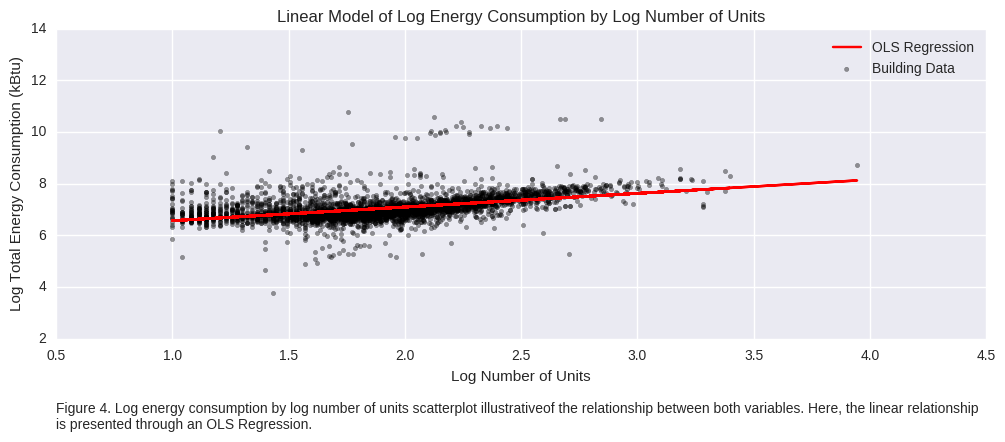

In [47]:
result_1 = smf.ols('LogSiteEUITotal ~ LogUnitsTotal', data = comb).fit()
fig, (ax_1) = pl.subplots(nrows = 1, ncols = 1, figsize = (12, 4))
ax_1.scatter(comb['LogUnitsTotal'], comb['LogSiteEUITotal'],
           alpha=0.4, s = 10, c = 'k', label = 'Building Data')
ax_1.axis([0.5, 4.5, 2, 14])
ax_1.plot(comb['LogUnitsTotal'], result_1.predict(), c = 'r', 
         label = 'OLS Regression')
ax_1.set_xlabel('Log Number of Units')
ax_1.set_ylabel('Log Total Energy Consumption (kBtu)')
ax_1.set_title('Linear Model of Log Energy Consumption by Log Number of Units')
ax_1.text(0.5, -1.5, 'Figure 4. Log energy consumption by log number of units scatterplot illustrative\
of the relationship between both variables. Here, the linear relationship \nis presented through an OLS Regression.')
ax_1.legend()

In [48]:
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LogSiteEUITotal   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     981.8
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          4.86e-193
Time:                        14:09:31   Log-Likelihood:                -2380.7
No. Observations:                4025   AIC:                             4765.
Df Residuals:                    4023   BIC:                             4778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         6.0346      0.033    183.904      0.000         5.970     6.099
LogUnitsTotal     0.5288      0.017     31.334      0.000         0.496     0.562
==============================================================================
Omnibus:                     2178.229   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45049.993
Skew:                           2.129   Prob(JB):                         0.00
Kurtosis:                      18.827   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

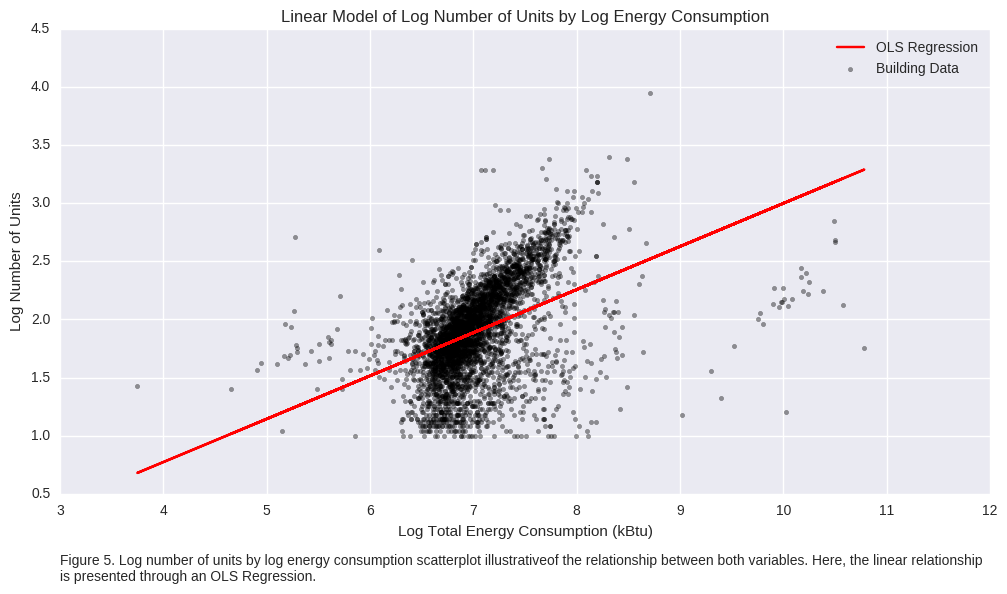

In [49]:
result_2 = smf.ols('LogUnitsTotal ~ LogSiteEUITotal', data = comb).fit()
fig, (ax_1) = pl.subplots(nrows = 1, ncols = 1, figsize = (12, 6))
ax_1.scatter(comb['LogSiteEUITotal'], comb['LogUnitsTotal'],
           alpha=0.4, s = 10, c = 'k', label = 'Building Data')
ax_1.axis([3, 12, 0.5, 4.5])
ax_1.plot(comb['LogSiteEUITotal'], result_2.predict(), c = 'r', 
         label = 'OLS Regression')
ax_1.set_ylabel('Log Number of Units')
ax_1.set_xlabel('Log Total Energy Consumption (kBtu)')
ax_1.set_title('Linear Model of Log Number of Units by Log Energy Consumption')
ax_1.text(3, -0.25, 'Figure 5. Log number of units by log energy consumption scatterplot illustrative\
of the relationship between both variables. Here, the linear relationship \nis presented through an OLS Regression.')
ax_1.legend()

In [50]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogUnitsTotal   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     981.8
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          4.86e-193
Time:                        14:10:35   Log-Likelihood:                -1667.0
No. Observations:                4025   AIC:                             3338.
Df Residuals:                    4023   BIC:                             3351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.7106      0.084     -8.506      0.000        -0.874    -0.547
LogSiteEUITotal     0.3709      0.012     31.334      0.000         0.348     0.394
==============================================================================
Omnibus:                      161.469   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.478
Skew:                          -0.443   Prob(JB):                     7.96e-44
Kurtosis:                       3.630   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#Units vs. Energy chi square.
comb = comb.sort_values('LogSiteEUITotal')
chisq_1 = np.sum(((result_1.predict()-comb['LogSiteEUITotal'])**2)/(comb['LogSiteEUITotal']))
print (chisq_1)
scipy.stats.chisquare(comb['LogSiteEUITotal'], f_exp = result_1.predict())

155.329827652


Power_divergenceResult(statistic=164.06534007475256, pvalue=1.0)

In [62]:
#Units vs. Energy chi square.
comb = comb.sort_values('LogSiteEUITotal')
chisq_2 = np.sum(((result_2.predict()-comb['LogSiteEUITotal'])**2)/(comb['LogSiteEUITotal']))
print (chisq_2)
scipy.stats.chisquare(comb['LogSiteEUITotal'], f_exp = result_2.predict())

15126.5186391


Power_divergenceResult(statistic=57254.72796165476, pvalue=0.0)

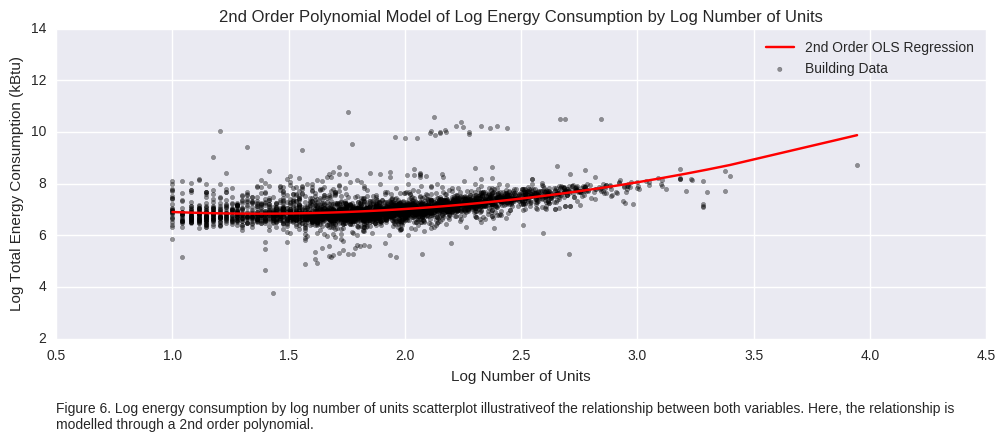

In [63]:
comb = comb.sort_values('LogUnitsTotal')
comb['LogUnitsTotal2'] = comb['LogUnitsTotal'] ** 2
result_3 = smf.ols('LogSiteEUITotal ~ LogUnitsTotal2 + LogUnitsTotal',
                   data = comb).fit()
result_3.params
fig, (ax_1) = pl.subplots(nrows = 1, ncols = 1, figsize = (12, 4))
ax_1.scatter(comb['LogUnitsTotal'], comb['LogSiteEUITotal'],
           alpha=0.4, s = 10, c = 'k', label = 'Building Data')
ax_1.axis([0.5, 4.5, 2, 14])
ax_1.plot(comb['LogUnitsTotal'], result_3.predict(), c = 'r', label = '2nd Order OLS Regression')
ax_1.set_xlabel('Log Number of Units')
ax_1.set_ylabel('Log Total Energy Consumption (kBtu)')
ax_1.set_title('2nd Order Polynomial Model of Log Energy Consumption by Log Number of Units')
ax_1.text(0.5, -1.5, 'Figure 6. Log energy consumption by log number of units scatterplot illustrative\
of the relationship between both variables. Here, the relationship is \nmodelled through a 2nd order polynomial.')
ax_1.legend()

In [66]:
comb = comb.sort_values('LogSiteEUITotal')
chisq1 = np.sum(((result_3.predict()-comb['LogSiteEUITotal'])**2)/(comb['LogSiteEUITotal']))
print (chisq_1)

result_3.summary()

155.329827652


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LogSiteEUITotal   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     668.9
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          1.59e-251
Time:                        16:37:44   Log-Likelihood:                -2242.2
No. Observations:                4025   AIC:                             4490.
Df Residuals:                    4022   BIC:                             4509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          7.7035      0.104     74.372      0.000         7.500     7.907
LogUnitsTotal2     0.4598      0.027     16.924      0.000         0.407     0.513
LogUnitsTotal     -1.2634      0.107    -11.791      0.000        -1.473    -1.053
==============================================================================
Omnibus:                     2326.965   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60192.633
Skew:                           2.261   Prob(JB):                         0.00
Kurtosis:                      21.398   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''
H0: The polynomial model is as good as as or inferior to 
the linear model

Ha: The polynomial model provides a significantly better fit than the linear model.

p = 0.05
'''

In [68]:
lr = -2 * (-result_3.llf - (-result_1.llf))
print (lr)
result_3.compare_lr_test(result_1)

276.880869507


(276.88086950710294, 3.5918822608714782e-62, 1.0)

In [ ]:
'''
The LR test statistic is 276.9, with a corresponding p-value of ~ 0. 
Therefore, we can reject the null hypothesis in favor of the alternative hypothesis: 
the polynomial indeed fits the data significantly more than the previous linear model.
'''